In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures, scale
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import datetime
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('600K US Housing Properties.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   property_url        600000 non-null  object 
 1   property_id         600000 non-null  int64  
 2   address             600000 non-null  object 
 3   street_name         599869 non-null  object 
 4   apartment           14815 non-null   object 
 5   city                599999 non-null  object 
 6   state               599999 non-null  object 
 7   latitude            529122 non-null  float64
 8   longitude           529122 non-null  float64
 9   postcode            599970 non-null  object 
 10  price               600000 non-null  float64
 11  bedroom_number      443845 non-null  float64
 12  bathroom_number     471733 non-null  float64
 13  price_per_unit      435365 non-null  float64
 14  living_space        447847 non-null  float64
 15  land_space          515119 non-nul

In [4]:
description = df.describe(include='all')
description

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type,property_status,year_build,total_num_units,listing_age,RunDate,agency_name,agent_name,agent_phone,is_owned_by_zillow
count,600000,6.000000e+05,600000,599869,14815,599999,599999,529122.000000,529122.000000,599970,...,600000,600000,0.0,0.0,600000.0,600000,444524,0.0,0.0,600000.000000
unique,600000,NaN,598588,339224,2664,7977,25,NaN,NaN,10820,...,7,2,NaN,NaN,NaN,1,34372,NaN,NaN,NaN
top,https://www.zillow.com/homedetails/3-Plat-83-1...,NaN,"(undisclosed Address), Rockport, TX 78382",(undisclosed Address),1,Chicago,TX,NaN,NaN,84043,...,SINGLE_FAMILY,FOR_SALE,NaN,NaN,NaN,2022-04-24 07:34:15,Coldwell Banker Realty,NaN,NaN,NaN
freq,1,NaN,36,1713,312,14138,146636,NaN,NaN,1102,...,354366,383365,NaN,NaN,NaN,600000,5936,NaN,NaN,NaN
mean,NaN,8.885042e+08,NaN,NaN,NaN,NaN,NaN,36.282379,-105.813906,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000498
std,NaN,9.724708e+08,NaN,NaN,NaN,NaN,NaN,5.673355,13.464633,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.022318
min,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,18.985142,-165.408250,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000
25%,NaN,5.402143e+07,NaN,NaN,NaN,NaN,NaN,32.612112,-117.346079,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2.066090e+08,NaN,NaN,NaN,NaN,NaN,35.403568,-101.897378,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2.066867e+09,NaN,NaN,NaN,NaN,NaN,39.661674,-95.354245,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000


In [5]:
df.columns

Index(['property_url', 'property_id', 'address', 'street_name', 'apartment',
       'city', 'state', 'latitude', 'longitude', 'postcode', 'price',
       'bedroom_number', 'bathroom_number', 'price_per_unit', 'living_space',
       'land_space', 'land_space_unit', 'broker_id', 'property_type',
       'property_status', 'year_build', 'total_num_units', 'listing_age',
       'RunDate', 'agency_name', 'agent_name', 'agent_phone',
       'is_owned_by_zillow'],
      dtype='object')

array([<AxesSubplot:title={'center':'price'}, xlabel='state'>],
      dtype=object)

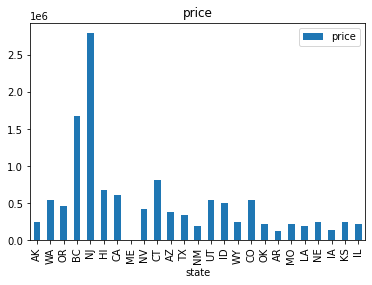

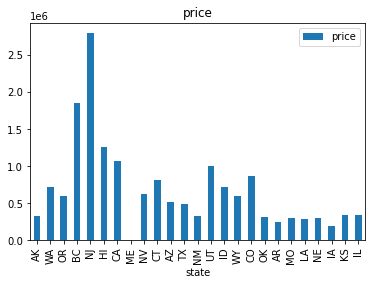

In [6]:
median=df.groupby('state', as_index=False, sort=False).agg({'price':'median'}).round()
mean=df.groupby('state', as_index=False, sort=False).agg({'price':'mean'}).round()

median.plot(subplots=True, x='state', kind='bar', label='median')
mean.plot(subplots=True, x='state', kind='bar', label='mean')

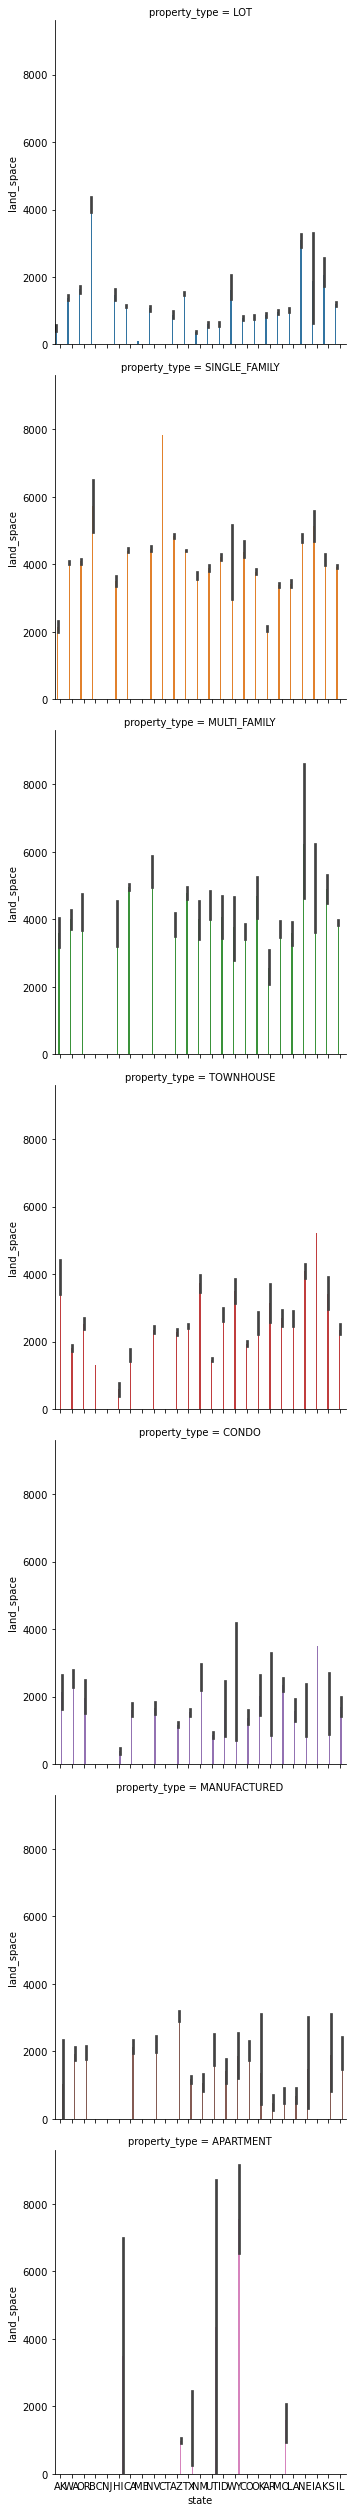

In [7]:
sns.catplot(
    data=df, x="state", y="land_space", row="property_type", hue="property_type",
    kind="bar"
)

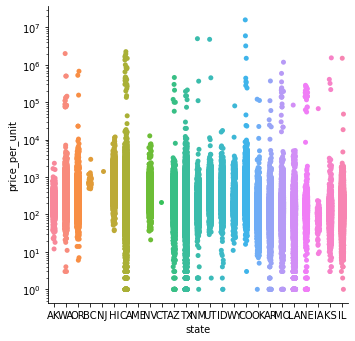

In [8]:
catplot = sns.catplot(data=df, x="state", y="price_per_unit")
catplot.set(yscale="log")

In [9]:
sp = df[['state', 'price']].groupby('state').count()
sp = sp.rename(columns={'price': 'count'})
sp

,count
state,
AK,5011
AR,18347
AZ,37494
BC,59
CA,102464
CO,27927
CT,1
HI,6959
IA,204


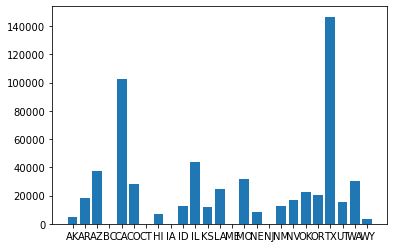

In [10]:
plt.bar(sp.index, 'count', data=sp)
plt.show()

In [11]:
df = df.drop(df[df.living_space == 0].index)
df = df.drop(df[df.price == 0].index)
df['longitude'] = -df['longitude']
#Selected just the Texas data to reduce column number so model can fit and predict
df = df[df.state == 'TX']

In [12]:
#Land space is an important metric for the price of the house but this dataset has multiple units
#All the values with 'acres' unit changed to 'sqft'
df.loc[df['land_space_unit']=='acres', 'land_space'] = df['land_space']*43560.00
df.loc[df['land_space_unit']=='acres', 'land_space_unit']='sqft'
df[['land_space','land_space_unit']]

,land_space,land_space_unit
180271,6969.600,sqft
180273,12632.400,sqft
180275,11325.600,sqft
180277,15246.000,sqft
180279,6000.000,sqft
...,...,...
446346,8145.720,sqft
446348,3920.400,sqft
446350,4356.000,sqft
446352,4299.372,sqft


In [13]:
list = ["bedroom_number", "bathroom_number", "living_space", "land_space", "price"]

In [14]:
for i in list:
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)
    df = df[(df[i] < q_hi) & (df[i] > q_low)]

In [15]:
pp = df[['property_type', 'price']].groupby('property_type').count()
pp = pp.rename(columns={'price': 'count'})
pp

,count
property_type,
APARTMENT,10
CONDO,1197
LOT,18
MANUFACTURED,1840
MULTI_FAMILY,384
SINGLE_FAMILY,68231
TOWNHOUSE,2162


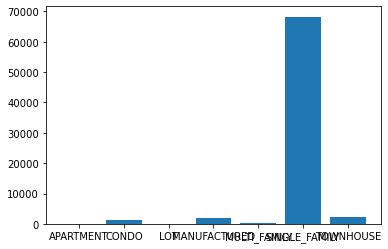

In [16]:
plt.bar(pp.index, 'count', data=pp)
plt.show()

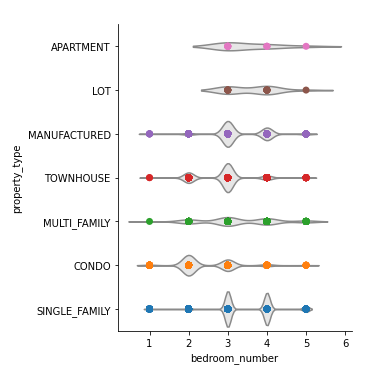

array([<AxesSubplot:title={'center':'price'}, xlabel='property_type'>],
      dtype=object)

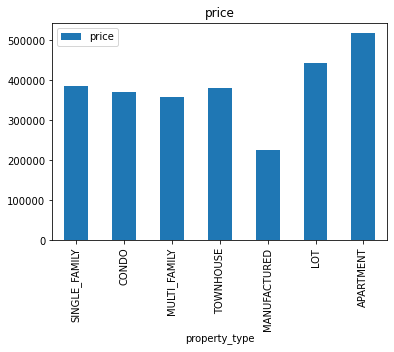

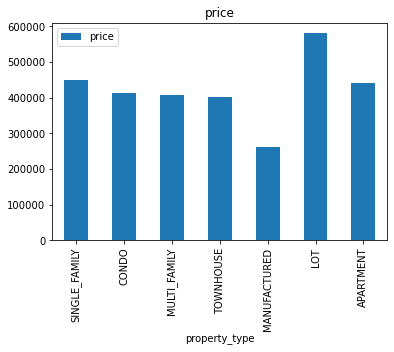

In [17]:
median=df.groupby('property_type', as_index=False, sort=False).agg({'price':'median'}).round()
mean=df.groupby('property_type', as_index=False, sort=False).agg({'price':'mean'}).round()

median.plot(subplots=True, x='property_type', kind='bar', label='median')
mean.plot(subplots=True, x='property_type', kind='bar', label='mean')

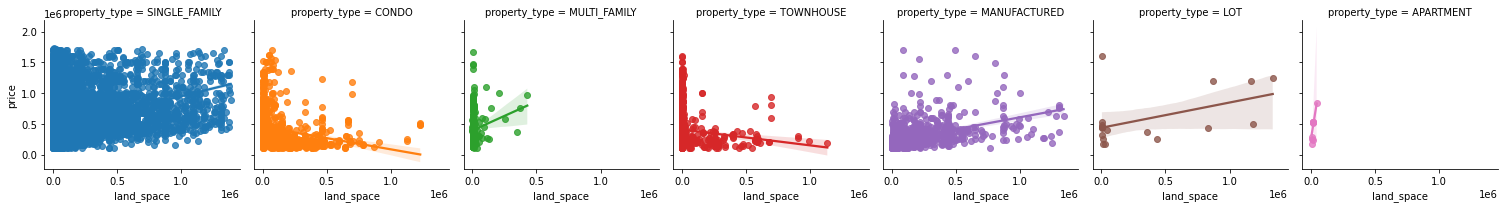

In [18]:
lmplot = sns.lmplot(x="land_space", y="price", col="property_type", hue="property_type", height=3, data=df)

In [19]:
df = df.drop(columns=['property_url', 'property_id', 'address', 'street_name', 'apartment', 'city', 'state', 'price_per_unit', 'land_space_unit', 'broker_id','property_status', 'year_build', 'total_num_units', 'listing_age',
       'RunDate', 'agency_name', 'agent_name', 'agent_phone',
       'is_owned_by_zillow'])

In [20]:
df_isna=df.isna()
df_isna

,latitude,longitude,postcode,price,bedroom_number,bathroom_number,living_space,land_space,property_type
180271,False,False,False,False,False,False,False,False,False
180273,False,False,False,False,False,False,False,False,False
180277,False,False,False,False,False,False,False,False,False
180281,False,False,False,False,False,False,False,False,False
180288,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
446346,False,False,False,False,False,False,False,False,False
446348,False,False,False,False,False,False,False,False,False
446350,False,False,False,False,False,False,False,False,False
446352,False,False,False,False,False,False,False,False,False


In [21]:
df_isna.columns=[c for c in df_isna.columns]
df_isna

,latitude,longitude,postcode,price,bedroom_number,bathroom_number,living_space,land_space,property_type
180271,False,False,False,False,False,False,False,False,False
180273,False,False,False,False,False,False,False,False,False
180277,False,False,False,False,False,False,False,False,False
180281,False,False,False,False,False,False,False,False,False
180288,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
446346,False,False,False,False,False,False,False,False,False
446348,False,False,False,False,False,False,False,False,False
446350,False,False,False,False,False,False,False,False,False
446352,False,False,False,False,False,False,False,False,False


In [22]:
df_isna.columns=[c+'_isna' for c in df_isna.columns]
df_isna

,latitude_isna,longitude_isna,postcode_isna,price_isna,bedroom_number_isna,bathroom_number_isna,living_space_isna,land_space_isna,property_type_isna
180271,False,False,False,False,False,False,False,False,False
180273,False,False,False,False,False,False,False,False,False
180277,False,False,False,False,False,False,False,False,False
180281,False,False,False,False,False,False,False,False,False
180288,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
446346,False,False,False,False,False,False,False,False,False
446348,False,False,False,False,False,False,False,False,False
446350,False,False,False,False,False,False,False,False,False
446352,False,False,False,False,False,False,False,False,False


In [23]:
df=pd.concat([df.fillna(0), df_isna.astype(float)], axis=1)
df

,latitude,longitude,postcode,price,bedroom_number,bathroom_number,living_space,land_space,property_type,latitude_isna,longitude_isna,postcode_isna,price_isna,bedroom_number_isna,bathroom_number_isna,living_space_isna,land_space_isna,property_type_isna
180271,31.786737,106.428020,79903,239500.0,5.0,3.0,1692.0,6969.600,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180273,31.784021,106.404450,79925,165000.0,4.0,2.0,1650.0,12632.400,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180277,31.790165,106.435960,79903,414700.0,4.0,3.0,3119.0,15246.000,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180281,31.785316,106.411150,79925,174950.0,4.0,2.0,1800.0,6098.400,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180288,31.799797,106.437600,79903,249000.0,3.0,3.0,2790.0,6098.400,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446346,33.059647,96.710945,75023,393000.0,3.0,2.0,1717.0,8145.720,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446348,33.044098,96.707720,75023,315000.0,3.0,3.0,1754.0,3920.400,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446350,33.069946,96.712920,75023,360000.0,4.0,3.0,2068.0,4356.000,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446352,33.070004,96.713900,75023,447000.0,4.0,3.0,2111.0,4299.372,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
description = df.describe(include='all')
description

,latitude,longitude,postcode,price,bedroom_number,bathroom_number,living_space,land_space,property_type,latitude_isna,longitude_isna,postcode_isna,price_isna,bedroom_number_isna,bathroom_number_isna,living_space_isna,land_space_isna,property_type_isna
count,73842.000000,73842.000000,73842,7.384200e+04,73842.000000,73842.000000,73842.000000,7.384200e+04,73842,73842.000000,73842.000000,73842.0,73842.0,73842.0,73842.0,73842.0,73842.0,73842.0
unique,NaN,NaN,1527,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,78253,NaN,NaN,NaN,NaN,NaN,SINGLE_FAMILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,668,NaN,NaN,NaN,NaN,NaN,68231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,27.658334,87.161134,NaN,4.417711e+05,3.500501,2.732381,2219.021397,3.447477e+04,NaN,0.102665,0.102665,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,9.494586,29.539486,NaN,2.432713e+05,0.698416,0.811622,743.747215,1.111927e+05,NaN,0.303523,0.303523,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,NaN,1.000000e+05,1.000000,1.750000,987.000000,1.307000e+03,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,29.525587,95.416041,NaN,2.799000e+05,3.000000,2.000000,1657.000000,6.094044e+03,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,30.110114,96.779823,NaN,3.799000e+05,3.000000,3.000000,2076.000000,8.028108e+03,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,32.443424,97.823783,NaN,5.312710e+05,4.000000,3.000000,2645.000000,1.319868e+04,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.isna().sum()

latitude                0
longitude               0
postcode                0
price                   0
bedroom_number          0
bathroom_number         0
living_space            0
land_space              0
property_type           0
latitude_isna           0
longitude_isna          0
postcode_isna           0
price_isna              0
bedroom_number_isna     0
bathroom_number_isna    0
living_space_isna       0
land_space_isna         0
property_type_isna      0
dtype: int64

In [26]:
df.head()

,latitude,longitude,postcode,price,bedroom_number,bathroom_number,living_space,land_space,property_type,latitude_isna,longitude_isna,postcode_isna,price_isna,bedroom_number_isna,bathroom_number_isna,living_space_isna,land_space_isna,property_type_isna
180271,31.786737,106.42802,79903,239500.0,5.0,3.0,1692.0,6969.6,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180273,31.784021,106.40445,79925,165000.0,4.0,2.0,1650.0,12632.4,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180277,31.790165,106.43596,79903,414700.0,4.0,3.0,3119.0,15246.0,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180281,31.785316,106.41115,79925,174950.0,4.0,2.0,1800.0,6098.4,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180288,31.799797,106.43760,79903,249000.0,3.0,3.0,2790.0,6098.4,SINGLE_FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# A crucial categorical feature 'property_type' is categorical variable so I wanted to transform that to a numeric one
dummies=pd.get_dummies(df[['postcode','property_type']], drop_first=True)
dummies

,postcode_75001,postcode_75002,postcode_75006,postcode_75007,postcode_75009,postcode_75010,postcode_75013,postcode_75017,postcode_75019,postcode_75020,...,postcode_79935,postcode_79936,postcode_79938,postcode_97316,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
180271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
180273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
180277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
180281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
180288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
446348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
446350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
446352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df = pd.concat([df,dummies],axis='columns')
df

,latitude,longitude,postcode,price,bedroom_number,bathroom_number,living_space,land_space,property_type,latitude_isna,...,postcode_79935,postcode_79936,postcode_79938,postcode_97316,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
180271,31.786737,106.428020,79903,239500.0,5.0,3.0,1692.0,6969.600,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
180273,31.784021,106.404450,79925,165000.0,4.0,2.0,1650.0,12632.400,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
180277,31.790165,106.435960,79903,414700.0,4.0,3.0,3119.0,15246.000,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
180281,31.785316,106.411150,79925,174950.0,4.0,2.0,1800.0,6098.400,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
180288,31.799797,106.437600,79903,249000.0,3.0,3.0,2790.0,6098.400,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446346,33.059647,96.710945,75023,393000.0,3.0,2.0,1717.0,8145.720,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
446348,33.044098,96.707720,75023,315000.0,3.0,3.0,1754.0,3920.400,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
446350,33.069946,96.712920,75023,360000.0,4.0,3.0,2068.0,4356.000,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0
446352,33.070004,96.713900,75023,447000.0,4.0,3.0,2111.0,4299.372,SINGLE_FAMILY,0.0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
df = df.drop(columns=['postcode','property_type'])
df

,latitude,longitude,price,bedroom_number,bathroom_number,living_space,land_space,latitude_isna,longitude_isna,postcode_isna,...,postcode_79935,postcode_79936,postcode_79938,postcode_97316,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
180271,31.786737,106.428020,239500.0,5.0,3.0,1692.0,6969.600,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180273,31.784021,106.404450,165000.0,4.0,2.0,1650.0,12632.400,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180277,31.790165,106.435960,414700.0,4.0,3.0,3119.0,15246.000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180281,31.785316,106.411150,174950.0,4.0,2.0,1800.0,6098.400,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180288,31.799797,106.437600,249000.0,3.0,3.0,2790.0,6098.400,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446346,33.059647,96.710945,393000.0,3.0,2.0,1717.0,8145.720,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
446348,33.044098,96.707720,315000.0,3.0,3.0,1754.0,3920.400,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
446350,33.069946,96.712920,360000.0,4.0,3.0,2068.0,4356.000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
446352,33.070004,96.713900,447000.0,4.0,3.0,2111.0,4299.372,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df.dtypes

latitude                       float64
longitude                      float64
price                          float64
bedroom_number                 float64
bathroom_number                float64
                                ...   
property_type_LOT                uint8
property_type_MANUFACTURED       uint8
property_type_MULTI_FAMILY       uint8
property_type_SINGLE_FAMILY      uint8
property_type_TOWNHOUSE          uint8
Length: 1548, dtype: object

In [31]:
description = df.describe(include='all')
description

,latitude,longitude,price,bedroom_number,bathroom_number,living_space,land_space,latitude_isna,longitude_isna,postcode_isna,...,postcode_79935,postcode_79936,postcode_79938,postcode_97316,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
count,73842.000000,73842.000000,7.384200e+04,73842.000000,73842.000000,73842.000000,7.384200e+04,73842.000000,73842.000000,73842.0,...,73842.000000,73842.000000,73842.000000,73842.000000,73842.000000,73842.000000,73842.000000,73842.000000,73842.000000,73842.000000
mean,27.658334,87.161134,4.417711e+05,3.500501,2.732381,2219.021397,3.447477e+04,0.102665,0.102665,0.0,...,0.000163,0.000758,0.002681,0.000014,0.016210,0.000244,0.024918,0.005200,0.924013,0.029279
std,9.494586,29.539486,2.432713e+05,0.698416,0.811622,743.747215,1.111927e+05,0.303523,0.303523,0.0,...,0.012747,0.027528,0.051713,0.003680,0.126284,0.015611,0.155877,0.071926,0.264978,0.168588
min,0.000000,0.000000,1.000000e+05,1.000000,1.750000,987.000000,1.307000e+03,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.525587,95.416041,2.799000e+05,3.000000,2.000000,1657.000000,6.094044e+03,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,30.110114,96.779823,3.799000e+05,3.000000,3.000000,2076.000000,8.028108e+03,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,32.443424,97.823783,5.312710e+05,4.000000,3.000000,2645.000000,1.319868e+04,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,36.461475,106.631890,1.727225e+06,5.000000,5.500000,4835.000000,1.384772e+06,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
features=df.describe().columns.drop(['price'])
features

Index(['latitude', 'longitude', 'bedroom_number', 'bathroom_number',
       'living_space', 'land_space', 'latitude_isna', 'longitude_isna',
       'postcode_isna', 'price_isna',
       ...
       'postcode_79935', 'postcode_79936', 'postcode_79938', 'postcode_97316',
       'property_type_CONDO', 'property_type_LOT',
       'property_type_MANUFACTURED', 'property_type_MULTI_FAMILY',
       'property_type_SINGLE_FAMILY', 'property_type_TOWNHOUSE'],
      dtype='object', length=1547)

In [33]:
targets=['price']
targets

['price']

In [34]:
X=df[features]
X

,latitude,longitude,bedroom_number,bathroom_number,living_space,land_space,latitude_isna,longitude_isna,postcode_isna,price_isna,...,postcode_79935,postcode_79936,postcode_79938,postcode_97316,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
180271,31.786737,106.428020,5.0,3.0,1692.0,6969.600,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180273,31.784021,106.404450,4.0,2.0,1650.0,12632.400,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180277,31.790165,106.435960,4.0,3.0,3119.0,15246.000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180281,31.785316,106.411150,4.0,2.0,1800.0,6098.400,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
180288,31.799797,106.437600,3.0,3.0,2790.0,6098.400,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446346,33.059647,96.710945,3.0,2.0,1717.0,8145.720,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
446348,33.044098,96.707720,3.0,3.0,1754.0,3920.400,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
446350,33.069946,96.712920,4.0,3.0,2068.0,4356.000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
446352,33.070004,96.713900,4.0,3.0,2111.0,4299.372,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
y=df[targets[0]]
y

180271    239500.0
180273    165000.0
180277    414700.0
180281    174950.0
180288    249000.0
            ...   
446346    393000.0
446348    315000.0
446350    360000.0
446352    447000.0
446354    377000.0
Name: price, Length: 73842, dtype: float64

## Hyperparameter Table

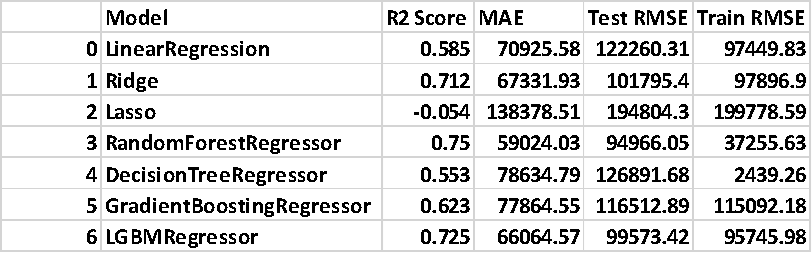

In [36]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
results = pd.DataFrame({'Price': y , 'Prediction': y_pred})

In [37]:
print('R2 Score', round(r2_score(y, y_pred),3))
print('MAE', round(mean_absolute_error(y, y_pred),2))
print('RMSE Score', round(metrics.mean_squared_error(y, y_pred, squared=False),2))

R2 Score 0.968
MAE 25324.48
RMSE Score 43546.1


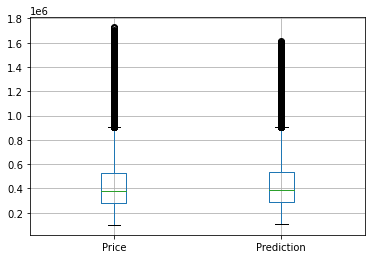

In [38]:
boxplot = results.boxplot(column=['Price', 'Prediction'], return_type='axes')

In [39]:
results = results.sort_values(by=['Price'])
results = results.reset_index()
results

,index,Price,Prediction
0,329325,100000.0,1.254037e+05
1,393546,100000.0,1.429190e+05
2,365476,100000.0,1.341607e+05
3,432052,100000.0,1.475479e+05
4,342234,100000.0,1.751740e+05
...,...,...,...
73837,323306,1725000.0,1.498220e+06
73838,300013,1725000.0,1.365216e+06
73839,311493,1725000.0,1.289903e+06
73840,299599,1725000.0,1.569760e+06


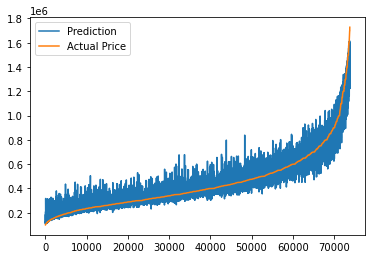

In [40]:
plt.plot(results.index, results['Prediction'], label='Prediction')
plt.plot(results.index, results['Price'], label='Actual Price')
plt.legend()
plt.show()